<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Ocean_outfalls/emissarios_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import scipy.stats


# Statistical analysis

- Data gathering (import from github's folder) - Own file
- Rearange the data structure as needed 
  - Setting datetime index
  - Data manipulation
  - Clean data structure
    - Handling missing data
    - Handling invalid values
    - Handling duplicate data (if needed)
    - Handling text data
    - Handling outliers 
- Plot data for early visualization
  - Plot
  - Scatter
  - Boxplot
- Summary of statistics of the dataframe (.describe())
- Residual analysis (in regression)
- Statistical overview of the given data
  - Regression (linear or other method)
  - $r$-value and $r^{2}$-value

### Data Manipulation 

- Coliformes totais 
- E. Coli

In [3]:
header = pd.MultiIndex.from_product([['Santos', 'PG1', 'PG2', 'PG3', 'Guarujá'], # Multiindex 
                                     ['Coliformes_Totais', 'E_Coli']], 
                                    names = ['Emissários', 'Parâmetro'])

emissario_dummy = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/508926339a14af10762064ee43b71f3d9d34976c/data/resumo_emissarios_nathan.xlsx?raw=true') # dummy variable

index = []
datestring = emissario_dummy['Resumo WAQ emissários baixada santista'].astype(str)
for i in range (2,len(datestring)):
  index.append(datetime.strptime(datestring[i], "%Y-%m-%d %H:%M:%S")) # Datetime set up

# datestring
# index

ct_ecoli = pd.DataFrame(emissario_dummy.iloc[2:,1:11].values, index = index, columns= header, dtype=float) # Parameter dataframe
ct_ecoli

Emissários            Santos                           PG1              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       129970000.0  20050000.0       133480000.0  33030000.0   
2011-02-01       155310000.0  16130000.0        65034020.0  11910375.0   
2011-03-01       155310000.0  12110000.0        77710995.0  10072285.0   
2011-04-01        54750000.0   9770000.0        65110000.0   9715000.0   
2011-05-01        92080000.0  11530000.0        68495000.0  14645500.0   
...                      ...         ...               ...         ...   
2020-08-01        84757500.0  13487500.0               NaN         NaN   
2020-09-01        64005000.0  12020000.0               NaN         NaN   
2020-10-01       151627500.0  17037500.0               NaN         NaN   
2020-11-01        49550000.0   7740000.0               NaN         NaN   
2020-12-01        62580000.0  16042500.0               NaN         NaN   

Emissários               PG2                           PG3              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       111815000.0  27880000.0         1298000.0    219985.0   
2011-02-01        38827000.0   9855250.0        25713000.0   4990500.0   
2011-03-01        56856500.0   5894500.0        39875000.0   7488500.0   
2011-04-01        77010000.0  11690000.0        17999000.0   2471000.0   
2011-05-01        35585000.0   9391475.0        23333000.0   4066500.0   
...                      ...         ...               ...         ...   
2020-08-01               NaN         NaN        56155000.0   8020000.0   
2020-09-01               NaN         NaN        50437500.0   8922500.0   
2020-10-01               NaN         NaN        50055000.0   8595000.0   
2020-11-01               NaN         NaN        39132500.0   7895000.0   
2020-12-01               NaN         NaN        41907500.0  10325000.0   

Emissários           Guarujá         
Parâmetro  Coliformes_Totais E_Coli  
2011-01-01               NaN    NaN  
2011-02-01               NaN    NaN  
2011-03-01               NaN    NaN  
2011-04-01               NaN    NaN  
2011-05-01               NaN    NaN  
...                      ...    ...  
2020-08-01               NaN    NaN  
2020-09-01               NaN    NaN  
2020-10-01               NaN    NaN  
2020-11-01               NaN    NaN  
2020-12-01               NaN    NaN  

[120 rows x 10 columns]

In [4]:
# ct_ecoli.xs('Guarujá',level = 'Emissários', axis = 1).describe()
ct_ecoli.describe()

Emissários            Santos                             PG1                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.180000e+02  1.190000e+02      7.200000e+01  7.200000e+01   
mean            8.245070e+07  1.215368e+07      7.142393e+07  1.120157e+07   
std             2.623482e+07  7.610149e+06      2.643584e+07  5.578257e+06   
min             2.250500e+07  2.950000e+06      1.251000e+07  2.500000e+05   
25%             6.389062e+07  7.915000e+06      5.484125e+07  7.532500e+06   
50%             7.704500e+07  1.108500e+07      7.077625e+07  1.018000e+07   
75%             9.629375e+07  1.383250e+07      8.404861e+07  1.440575e+07   
max             1.553100e+08  7.397500e+07      1.516300e+08  3.303000e+07   

Emissários               PG2                             PG3                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           7.200000e+01  7.200000e+01      1.160000e+02  1.150000e+02   
mean            4.947129e+07  8.376930e+06      4.202664e+07  7.367796e+06   
std             2.725670e+07  4.783041e+06      2.571408e+07  5.122356e+06   
min             2.145000e+06  2.250000e+05      1.298000e+06  2.199850e+05   
25%             3.096625e+07  5.772500e+06      2.460125e+07  4.172500e+06   
50%             4.361750e+07  7.800000e+06      3.670500e+07  7.344000e+06   
75%             6.010250e+07  9.877875e+06      5.280875e+07  8.951250e+06   
max             1.516250e+08  2.788000e+07      1.477225e+08  3.591250e+07   

Emissários           Guarujá                
Parâmetro  Coliformes_Totais        E_Coli  
count           2.400000e+01  2.400000e+01  
mean            4.117542e+07  5.711042e+06  
std             1.607597e+07  4.250218e+06  
min             1.570500e+07  9.250000e+05  
25%             3.142500e+07  3.132500e+06  
50%             3.697250e+07  4.700000e+06  
75%             4.758875e+07  6.908750e+06  
max             9.234500e+07  2.202000e+07

In [5]:
# Interpolated data (Linear) - Check best fit for interpolation

ct_ecoli_interpolate = ct_ecoli.copy()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['Santos']
ct_ecoli_interpolate['Santos'] = ct_ecoli_interpolate_dummy.interpolate() 
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG1']
ct_ecoli_interpolate['PG1'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG2']
ct_ecoli_interpolate['PG2'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG3']
ct_ecoli_interpolate['PG3'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['Guarujá']
ct_ecoli_interpolate_dummy.iloc[72,0] = ct_ecoli_interpolate_dummy.iloc[80,0]
ct_ecoli_interpolate_dummy.iloc[72,1] = ct_ecoli_interpolate_dummy.iloc[80,1]
ct_ecoli_interpolate['Guarujá'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate.iloc[108:]['Guarujá'] = np.nan

ct_ecoli_interpolate

# ct_ecoli_interpolate['Guarujá'] = ct_ecoli.xs('Guarujá',level = 'Emissários', axis = 1)
# ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos']



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Emissários            Santos                           PG1              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       129970000.0  20050000.0       133480000.0  33030000.0   
2011-02-01       155310000.0  16130000.0        65034020.0  11910375.0   
2011-03-01       155310000.0  12110000.0        77710995.0  10072285.0   
2011-04-01        54750000.0   9770000.0        65110000.0   9715000.0   
2011-05-01        92080000.0  11530000.0        68495000.0  14645500.0   
...                      ...         ...               ...         ...   
2020-08-01        84757500.0  13487500.0        95060000.0  13350000.0   
2020-09-01        64005000.0  12020000.0        95060000.0  13350000.0   
2020-10-01       151627500.0  17037500.0        95060000.0  13350000.0   
2020-11-01        49550000.0   7740000.0        95060000.0  13350000.0   
2020-12-01        62580000.0  16042500.0        95060000.0  13350000.0   

Emissários               PG2                           PG3              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       111815000.0  27880000.0         1298000.0    219985.0   
2011-02-01        38827000.0   9855250.0        25713000.0   4990500.0   
2011-03-01        56856500.0   5894500.0        39875000.0   7488500.0   
2011-04-01        77010000.0  11690000.0        17999000.0   2471000.0   
2011-05-01        35585000.0   9391475.0        23333000.0   4066500.0   
...                      ...         ...               ...         ...   
2020-08-01        80747500.0  11360000.0        56155000.0   8020000.0   
2020-09-01        80747500.0  11360000.0        50437500.0   8922500.0   
2020-10-01        80747500.0  11360000.0        50055000.0   8595000.0   
2020-11-01        80747500.0  11360000.0        39132500.0   7895000.0   
2020-12-01        80747500.0  11360000.0        41907500.0  10325000.0   

Emissários           Guarujá         
Parâmetro  Coliformes_Totais E_Coli  
2011-01-01               NaN    NaN  
2011-02-01               NaN    NaN  
2011-03-01               NaN    NaN  
2011-04-01               NaN    NaN  
2011-05-01               NaN    NaN  
...                      ...    ...  
2020-08-01               NaN    NaN  
2020-09-01               NaN    NaN  
2020-10-01               NaN    NaN  
2020-11-01               NaN    NaN  
2020-12-01               NaN    NaN  

[120 rows x 10 columns]

In [6]:
ct_ecoli_interpolate.describe()

Emissários            Santos                             PG1                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.200000e+02  1.200000e+02      1.200000e+02  1.200000e+02   
mean            8.262508e+07  1.214825e+07      7.724038e+07  1.220826e+07   
std             2.633057e+07  7.578339e+06      2.677080e+07  5.006686e+06   
min             2.250500e+07  2.950000e+06      1.251000e+07  2.500000e+05   
25%             6.373062e+07  7.937500e+06      6.017125e+07  8.841250e+06   
50%             7.704500e+07  1.112750e+07      7.384750e+07  1.233108e+07   
75%             9.659000e+07  1.372125e+07      9.506000e+07  1.502625e+07   
max             1.553100e+08  7.397500e+07      1.516300e+08  3.303000e+07   

Emissários               PG2                             PG3                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.200000e+02  1.200000e+02      1.200000e+02  1.200000e+02   
mean            5.240817e+07  9.341033e+06      4.159286e+07  7.257304e+06   
std             2.410055e+07  4.075815e+06      2.542823e+07  5.056312e+06   
min             2.145000e+06  2.250000e+05      1.298000e+06  2.199850e+05   
25%             3.497250e+07  6.873750e+06      2.460125e+07  4.114125e+06   
50%             4.935958e+07  9.626000e+06      3.639375e+07  7.086250e+06   
75%             6.368125e+07  1.147875e+07      5.091438e+07  8.926875e+06   
max             1.516250e+08  2.788000e+07      1.477225e+08  3.591250e+07   

Emissários           Guarujá                
Parâmetro  Coliformes_Totais        E_Coli  
count           3.600000e+01  3.600000e+01  
mean            3.913139e+07  5.076806e+06  
std             1.335985e+07  3.758131e+06  
min             1.570500e+07  9.250000e+05  
25%             3.474500e+07  3.090000e+06  
50%             3.564000e+07  5.250000e+06  
75%             4.523000e+07  5.573750e+06  
max             9.234500e+07  2.202000e+07

### Santos 


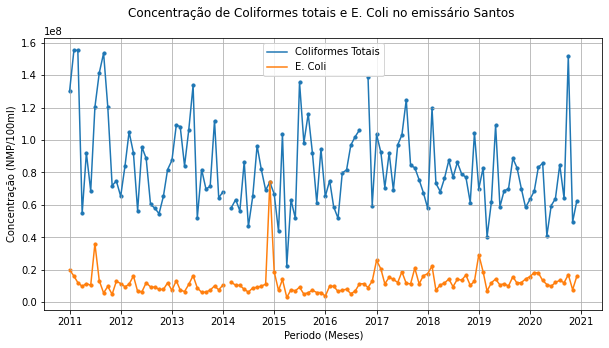

In [7]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()
 

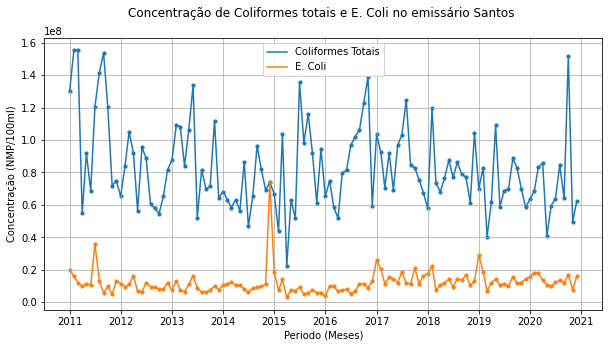

In [8]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

Text(0.5, 1.0, 'Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')

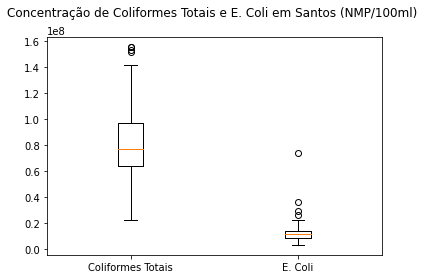

In [9]:
plt.boxplot([ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(),ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()])
plt.xticks([1, 2], ['Coliformes Totais', 'E. Coli'])
plt.title('Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')


In [10]:
# Outliers detection and handling

def outlier_santos():

  Q1 = np.percentile(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=25)
  Q3 = np.percentile(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=75)
  IQ = (Q3 - Q1)
  upper_fence = Q3 + 1.5*IQ
  lower_fence = Q1 - 1.5*IQ
  
  ct_outliers = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'][(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'] <= lower_fence) | (ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'] >= upper_fence)]
  
  Q1 = np.percentile(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=25)
  Q3 = np.percentile(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=75)
  IQ = (Q3 - Q1)
  upper_fence = Q3 + 1.5*IQ
  lower_fence = Q1 - 1.5*IQ
  
  ec_outliers = ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'][(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'] <= lower_fence) | (ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'] >= upper_fence)]

  return print('Os valores a seguir são os outliers dos dados de Coliformes Totais para Santos:\n{}'.format(ct_outliers) + '\n\n' +
               'Os valores a seguir são os outliers dos dados de E. Coli para Santos: \n{}'.format(ec_outliers))

outlier_santos() 




Os valores a seguir são os outliers dos dados de Coliformes Totais para Santos:
2011-02-01    155310000.0
2011-03-01    155310000.0
2011-09-01    153570000.0
2020-10-01    151627500.0
Name: Santos, dtype: float64

Os valores a seguir são os outliers dos dados de E. Coli para Santos: 
2011-07-01    36090000.0
2014-12-01    73975000.0
2017-01-01    25855000.0
2019-01-01    29345000.0
Name: Santos, dtype: float64


Text(0.5, 1.0, 'Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')

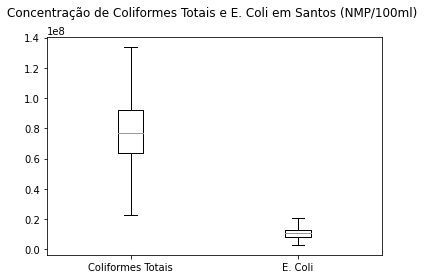

In [11]:
# Dataset with outliers correction (substituting by mean)

ct_mean = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].mean()
ec_mean = ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].mean()


ct_ecoli_interpolate.loc[( '2011-02-01','2011-03-01','2011-09-01', '2020-10-01', '2011-08-01','2015-07-01','2016-11-01' ), ('Santos', 'Coliformes_Totais')]  = ct_mean
ct_ecoli_interpolate.loc[( '2011-07-01','2014-12-01','2017-01-01', '2019-01-01','2018-02-01', '2017-10-01' ), ('Santos', 'E_Coli')]  = ec_mean


plt.boxplot([ct_ecoli_interpolate.loc[:, ('Santos', 'Coliformes_Totais')],ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()])
plt.xticks([1, 2], ['Coliformes Totais', 'E. Coli'])
plt.title('Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')



# Coliformes totais

### Linear Regression (Santos)

In [12]:
# Regression analysis (linear) - Unified for all years (Coliformes Totais)

datestring2 = pd.DatetimeIndex(datestring[2:]) # Converting to DatetimeIndex to manipulate accordingly
months = datestring2.month[0:12] # Simulate one year 
year = []

for i in range (len(datestring2)):
  year.append(i) # Represent the amount of months analyzed over N years

def regressao_unif_ct():
  a = np.zeros(1)
  b = np.zeros(1)

  a, b = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 1)
  col_santos_linear_unif = np.poly1d((a,b))

  return col_santos_linear_unif

regressao_unif_ct()

poly1d([  -97961.26033058, 84675262.35078058])

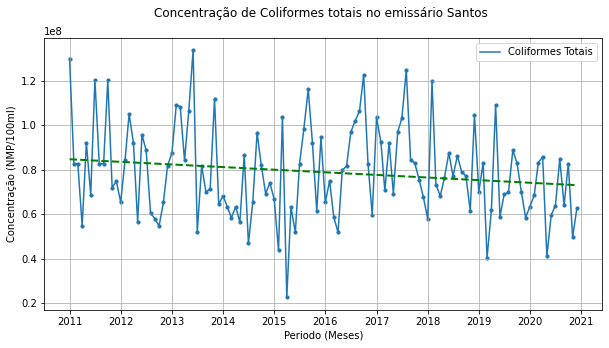

In [13]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.1646142381277976

O coeficiente de determinação é: 0.027097847394395254


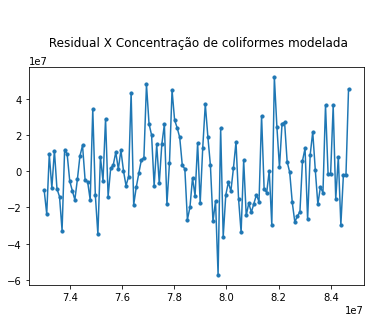

In [14]:
# Residual analysis of regression line - linear - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value


In [15]:
# Regression analysis (linear) - Separate for each year (Coliformes totais)



# type(datestring2)

# a_colsantos_2011, b_colsantos_2011 = np.polyfit(months,ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
# f_linear_a_col_santos = np.poly1d((a_colsantos_2011, b_colsantos_2011))

def regressao_frac_ct ():

    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a[0], b[0]))

    a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a[1], b[1]))

    a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a[2], b[2]))
    
    a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a[3], b[3]))

    a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a[4], b[4]))

    a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a[5], b[5]))

    a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a[6], b[6]))

    a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a[7], b[7]))

    a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a[8], b[8]))

    a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = (np.poly1d((a[9], b[9])))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_frac_ct()    

(poly1d([ -968184.14918415, 94903224.74747474]),
 poly1d([-1770926.57342658, 87136439.39393936]),
 poly1d([-2.49606643e+06,  1.06264848e+08]),
 poly1d([ 1522543.7062937 , 59247840.90909091]),
 poly1d([ 3458689.1025641 , 52227277.77777777]),
 poly1d([ 2824705.41958042, 63472338.38383836]),
 poly1d([-1137360.13986015, 95996174.24242423]),
 poly1d([  303164.33566433, 78713181.81818178]),
 poly1d([  281984.26573426, 69981477.27272728]),
 poly1d([ -548223.48484849, 70965751.26262625]))

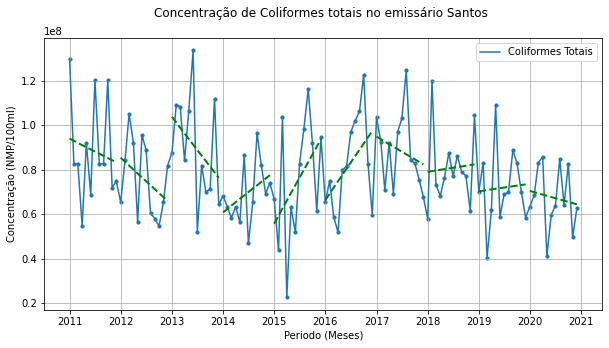

In [16]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [17]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.27077742484776013

O coeficiente de determinação é: 0.07332041380718439


### Quadratic regression (Santos)

In [18]:
# Regression analysis (quadratic) - Unified for all years (Coliformes Totais)

def regressao_quad_unif_ct():

  a_quad, a1_quad, b_quad = np.polyfit(year, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], 2)
  reg_quad = np.poly1d((a1_quad, a_quad, b_quad))

  return reg_quad

regressao_quad_unif_ct()

poly1d([-8.82436499e+04,  1.00764588e+03,  1.14916669e+07])

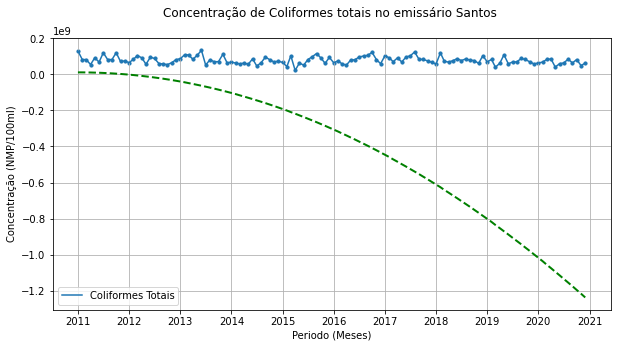

In [19]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_quad_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.16849438643453715

O coeficiente de determinação é: 0.028390358259951138


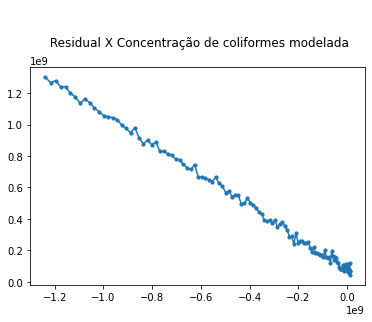

In [20]:
# Residual analysis of regression line - quadratic - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_quad_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value

In [21]:
# Regression analysis (quadratic) - Separate for each year (Coliformes totais)

def regressao_quad_frac_ct ():
    a1 = np.zeros(10)
    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a1[0], a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a1[0], a[0], b[0]))

    a1[1], a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a1[1], a[1], b[1]))

    a1[2], a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a1[2], a[2], b[2]))
    
    a1[3], a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a1[3], a[3], b[3]))

    a1[4], a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a1[4], a[4], b[4]))

    a1[5], a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a1[5], a[5], b[5]))

    a1[6], a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a1[6], a[6], b[6]))

    a1[7], a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a1[7], a[7], b[7]))

    a1[8], a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a1[8], a[8], b[8]))

    a1[9], a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = np.poly1d((a1[9], a[9], b[9]))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_quad_frac_ct()    

(poly1d([ 3.27437146e+05, -5.22486705e+06,  1.04835485e+08]),
 poly1d([ -100668.08191808,  -462241.50849154, 84082840.90909095]),
 poly1d([-1.26172577e+05, -8.55822927e+05,  1.02437614e+08]),
 poly1d([   88701.92307692,   369418.70629371, 61938465.9090909 ]),
 poly1d([-1.24794997e+04,  3.62092260e+06,  5.18487330e+07]),
 poly1d([ -802093.63553114, 13251922.68148521, 39142164.77272715]),
 poly1d([ -466690.80919081,  4929620.3796204 , 81839886.36363624]),
 poly1d([  157518.73126873, -1744579.17082919, 83491250.00000003]),
 poly1d([ -302717.90709291,  4217317.05794205, 60799034.09090909]),
 poly1d([ -116962.39177489,   972287.60822511, 67417892.04545453]))

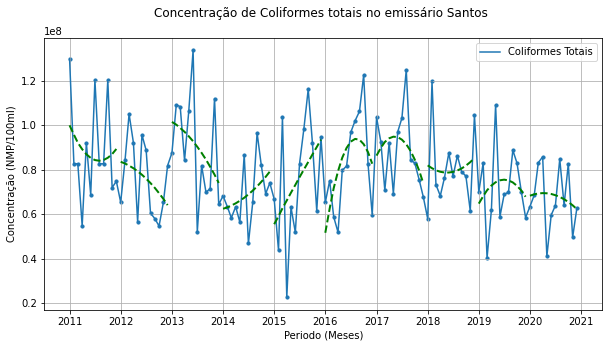

In [22]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_quad_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_quad_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_quad_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_quad_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_quad_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_quad_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_quad_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_quad_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_quad_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_quad_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [23]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_quad_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_quad_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_quad_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_quad_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_quad_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_quad_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_quad_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_quad_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_quad_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_quad_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.3310392271167134

O coeficiente de determinação é: 0.10958696989003096


### Cubic regression (Santos)

In [24]:
# Regression analysis (cubic) - Unified for all years (Coliformes Totais)

def regressao_cubic_unif_ct():

  a_cub, a1_cub, a2_cub, b_cub = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 3)
  reg_cub = np.poly1d((a_cub, a1_cub, a2_cub, b_cub))

  return reg_cub

regressao_cubic_unif_ct()

poly1d([-1.48970976e+02,  2.58906036e+04, -1.27503443e+06,  9.52726795e+07])

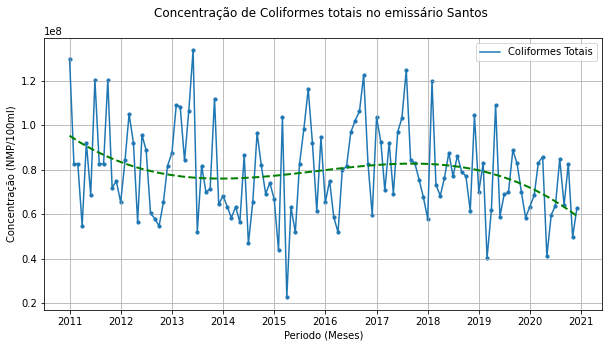

In [25]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_cubic_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.2899452836894066

O coeficiente de determinação é: 0.08406826753373046


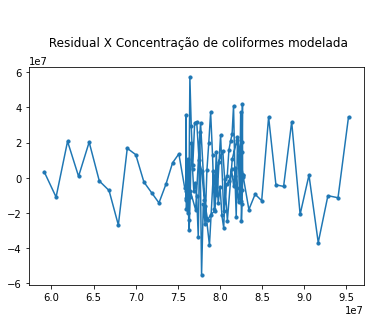

In [26]:
# Residual analysis of regression line - quadratic - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_cubic_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value

In [27]:
# Regression analysis (cubic) - Separate for each year (Coliformes totais)

def regressao_cub_frac_ct ():
    a2 = np.zeros(10)
    a1 = np.zeros(10)
    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a2[0],a1[0], a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a2[0],a1[0], a[0], b[0]))

    a2[1],a1[1], a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a2[1],a1[1], a[1], b[1]))

    a2[2],a1[2], a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a2[2],a1[2], a[2], b[2]))
    
    a2[3],a1[3], a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a2[3],a1[3], a[3], b[3]))

    a2[4],a1[4], a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a2[4],a1[4], a[4], b[4]))

    a2[5],a1[5], a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a2[5],a1[5], a[5], b[5]))

    a2[6],a1[6], a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a2[6],a1[6], a[6], b[6]))

    a2[7],a1[7], a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a2[7],a1[7], a[7], b[7]))

    a2[8],a1[8], a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a2[8],a1[8], a[8], b[8]))

    a2[9],a1[9], a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = np.poly1d((a2[9],a1[9], a[9], b[9]))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_cub_frac_ct()   

(poly1d([-4.47995554e+05,  9.06335045e+06, -5.24883980e+07,  1.65986878e+08]),
 poly1d([  322084.3045843 , -6381312.02131201, 33517652.62515252,
        40118333.33333371]),
 poly1d([  180547.13804714, -3646841.76934176, 18191900.13690006,
        77792929.29292963]),
 poly1d([  -135305.94405594,   2727167.83216781, -13905358.39160826,
         80407727.27272698]),
 poly1d([  -275261.01830268,   5355110.35723533, -25419114.83269801,
         89421861.95286155]),
 poly1d([  -445464.29033929,   7884460.02608499, -33744559.94930974,
         99948040.40403979]),
 poly1d([-2.97581585e+05,  5.33615010e+06, -2.64652368e+07,  1.22459773e+08]),
 poly1d([  161106.57860658, -2984059.55155958, 15252164.87216498,
        61500202.02020211]),
 poly1d([  -159130.73038073,   2800331.33533131, -12570974.99722486,
         82520378.78787853]),
 poly1d([-3.55943085e+04,  5.77126623e+05, -2.78291194e+06,  7.22765152e+07]))

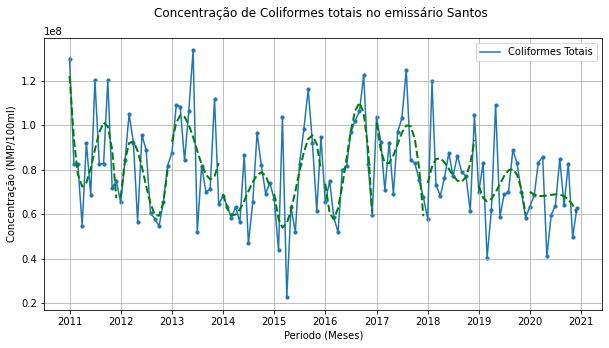

In [28]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_cub_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_cub_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_cub_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_cub_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_cub_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_cub_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_cub_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_cub_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_cub_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_cub_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [29]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_cub_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_cub_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_cub_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_cub_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_cub_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_cub_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_cub_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_cub_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_cub_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_cub_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.5346023868721738

O coeficiente de determinação é: 0.28579971204942534


### Quartic regression (Santos)

In [30]:
# Regression analysis (quartic) - Unified for all years (Coliformes Totais)

def regressao_quart_unif_ct():

  a_quart, a1_quart, a2_quart, a3_quart, b_quart = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 4)
  reg_quart = np.poly1d((a_quart, a1_quart, a2_quart, a3_quart, b_quart))

  return reg_quart

regressao_quart_unif_ct()

poly1d([ 1.73423784e-01, -1.90245836e+02,  2.90394097e+04, -1.35749571e+06,
        9.57448332e+07])

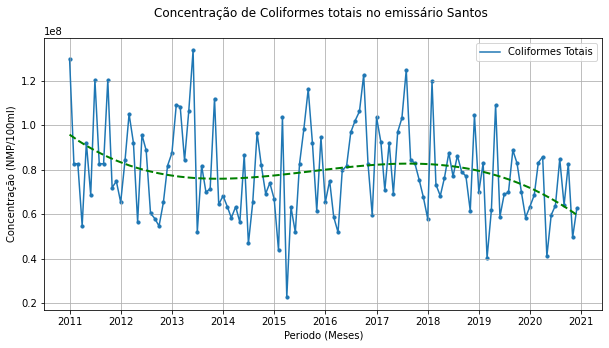

In [31]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_quart_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.29006401453671776

O coeficiente de determinação é: 0.08413713252915721


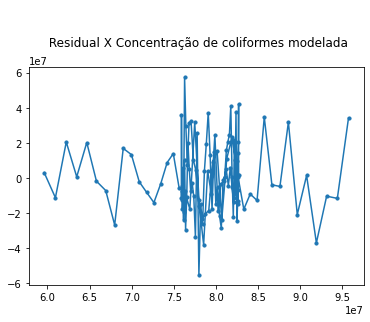

In [32]:
# Residual analysis of regression line - quadratic - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_quart_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value

In [33]:
# Regression analysis (quartic) - Separate for each year (Coliformes totais)

def regressao_quart_frac_ct ():
    
    a3 = np.zeros(10)
    a2 = np.zeros(10)
    a1 = np.zeros(10)
    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a3[0], a2[0],a1[0], a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a3[0], a2[0],a1[0], a[0], b[0]))

    a3[1],a2[1],a1[1], a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a3[1],a2[1],a1[1], a[1], b[1]))

    a3[2],a2[2],a1[2], a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a3[2],a2[2],a1[2], a[2], b[2]))
    
    a3[3],a2[3],a1[3], a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a3[3],a2[3],a1[3], a[3], b[3]))

    a3[4],a2[4],a1[4], a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a3[4],a2[4],a1[4], a[4], b[4]))

    a3[5],a2[5],a1[5], a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a3[5],a2[5],a1[5], a[5], b[5]))

    a3[6],a2[6],a1[6], a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a3[6],a2[6],a1[6], a[6], b[6]))

    a3[7],a2[7],a1[7], a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a3[7],a2[7],a1[7], a[7], b[7]))

    a3[8],a2[8],a1[8], a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a3[8],a2[8],a1[8], a[8], b[8]))

    a3[9],a2[9],a1[9], a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = np.poly1d((a3[9],a2[9],a1[9], a[9], b[9]))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_quart_frac_ct()   

(poly1d([ 5.42675523e+04, -1.85895191e+06,  2.11960246e+07, -9.09873501e+07,
         1.99849831e+08]),
 poly1d([ 6.03620338e+03,  1.65143017e+05, -5.03178941e+06,  2.92353975e+07,
         4.38849242e+07]),
 poly1d([-5.23779866e+04,  1.54237479e+06, -1.53570631e+07,  5.53503403e+07,
         4.51090657e+07]),
 poly1d([-1.43188192e+04,  2.36983355e+05, -4.74111032e+05, -3.74717894e+06,
         7.14727841e+07]),
 poly1d([-2.61464404e+03, -2.07280273e+05,  4.77055065e+06, -2.35642116e+07,
         8.77903241e+07]),
 poly1d([-3.62928777e+04,  4.98150530e+05, -2.29590487e+05, -7.99735557e+06,
         7.73012847e+07]),
 poly1d([ 6.13406906e+04, -1.89243954e+06,  1.90501759e+07, -6.99820753e+07,
         1.60736364e+08]),
 poly1d([ 5.44935533e+03,  1.94233400e+04, -1.76573940e+06,  1.13862365e+07,
         6.49005997e+07]),
 poly1d([-6.94219843e+03,  2.13664287e+04,  1.24825412e+06, -7.64598108e+06,
         7.81884470e+07]),
 poly1d([   -54079.53634907,   1370473.63660643, -11513512.57466

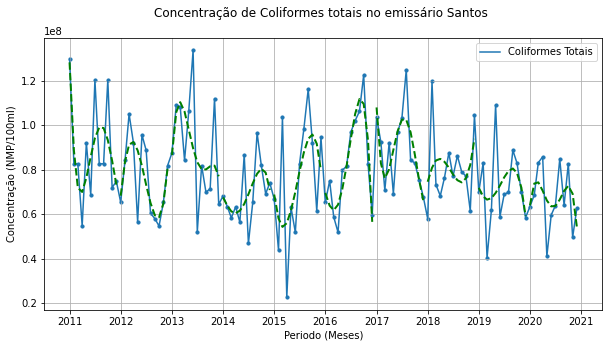

In [34]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_quart_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_quart_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_quart_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_quart_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_quart_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_quart_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_quart_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_quart_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_quart_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_quart_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [35]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_quart_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_quart_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_quart_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_quart_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_quart_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_quart_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_quart_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_quart_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_quart_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_quart_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.5737132848178118

O coeficiente de determinação é: 0.32914693317644367


### Multiple linear regression 
- Considering other variables such as:
  - Temperature
  - Current 
  - Wind velocity
  - Discharge rate

In [87]:
# Import extra data (Temperature, Wind and Discharge) result = float(my_str.replace(',', ''))

wind_df = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/da85a2e914d7ab8c5e18b6a5398051ae832323bd/data/vento_modificado%20(1).xlsx?raw=true')
wind_df = wind_df.iloc[:, 3:8]
wind_df = wind_df.set_axis(['Day','Hour','Minutes','Seconds','Wind speed'], axis = 1,inplace=False)

timestamp = pd.date_range(start='1/1/2019', end='1/1/2020', freq = 'H')
wind_df['Date Time'] = timestamp
wind_df = wind_df.set_index('Date Time')
wind_df

,Day,Hour,Minutes,Seconds,Wind speed
Date Time,,,,,
2019-01-01 00:00:00,0,0,0,0,2.0
2019-01-01 01:00:00,0,1,0,0,1.1
2019-01-01 02:00:00,0,2,0,0,0.7
2019-01-01 03:00:00,0,3,0,0,0.5
2019-01-01 04:00:00,0,4,0,0,0.7
...,...,...,...,...,...
2019-12-31 20:00:00,364,20,0,0,2.6
2019-12-31 21:00:00,364,21,0,0,2.6
2019-12-31 22:00:00,364,22,0,0,2.6


In [84]:
header_temp = ['Time minutes', 'Relative humidity %', 'Air temperature (ºC)', 'Net radiation (J/m2/s)']
temperature_df = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/da85a2e914d7ab8c5e18b6a5398051ae832323bd/data/temperatura_base_2019.csv?raw=true', header = None, sep = ' ')

temperature_df = temperature_df.drop([1, 3, 5], axis = 1)
temperature_df = temperature_df.set_axis(header_temp, axis = 1, inplace=False)

timestamp = pd.date_range(start='1/1/2019', end='1/1/2020', freq = '6H')
temperature_df['Date Time'] = timestamp
temperature_df = temperature_df.set_index('Date Time')

temperature_df

,Time minutes,Relative humidity %,Air temperature (ºC),Net radiation (J/m2/s)
Date Time,,,,
2019-01-01 00:00:00,0,82.94729,24.65000,-40.89990
2019-01-01 06:00:00,360,80.94626,25.12000,130.00000
2019-01-01 12:00:00,720,88.24274,25.06998,883.40010
2019-01-01 18:00:00,1080,89.11889,25.18000,185.40010
2019-01-02 00:00:00,1440,90.48352,24.86002,-63.19995
...,...,...,...,...
2019-12-31 00:00:00,524160,87.59782,23.79001,-34.50000
2019-12-31 06:00:00,524520,83.55170,24.42002,148.70000
2019-12-31 12:00:00,524880,88.22952,24.15000,889.60010


In [101]:
multi_header = pd.MultiIndex.from_product([['EPC VILA ZILDA','EPC SANTOS','EPC CAIÇARA - PG3', 'EMISSÁRIO FORTE - PG1', 'EMISSÁRIO TUPI - PG2' ],
                                     ['Vazão (L/s)','vazao_maxima','vazao_minima']],
                                    names=['Emissários','Discharge'])

discharge = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/ec4bb1aade50e3e703db3ef3f4c5406474f637fa/data/vazoes_corrigidas.xlsx?raw=true',skiprows = 2,header = None)
discharge = discharge.iloc[:,1:].to_numpy()
discharge_df = pd.DataFrame(discharge,columns = multi_header)

date_time = 
discharge_df

Emissários EPC VILA ZILDA                             EPC SANTOS               \
Discharge     Vazão (L/s) vazao_maxima vazao_minima  Vazão (L/s) vazao_maxima   
0                  512.46          NaN          NaN      2795.87          NaN   
1                  388.86          NaN          NaN      2524.96          NaN   
2                  493.31          NaN          NaN      2882.52          NaN   
3                  566.63          NaN          NaN  2674.236389          NaN   
4                  452.33          NaN          NaN  2412.454898          NaN   
..                    ...          ...          ...          ...          ...   
115                260.89        628.1         82.6      1946.16       3990.0   
116                163.79        670.0         44.0      1876.54       3630.0   
117                302.52        564.0         79.0      1952.06       4500.0   
118                230.03        620.0         36.0      2133.34       4250.0   
119                423.68        831.0         81.0      2096.27       4050.0   

Emissários              EPC CAIÇARA - PG3                            \
Discharge  vazao_minima       Vazão (L/s) vazao_maxima vazao_minima   
0                   NaN         33.098865          NaN          NaN   
1                   NaN          21.45792          NaN          NaN   
2                   NaN         30.992384          NaN          NaN   
3                   NaN         31.345293          NaN          NaN   
4                   NaN         21.931004          NaN          NaN   
..                  ...               ...          ...          ...   
115               500.0        116.359767         1040           16   
116               460.0            117.43         1025           73   
117               580.0            118.94          907           69   
118               690.0            222.61         1198           61   
119               600.0            263.92          539           27   

Emissários EMISSÁRIO FORTE - PG1                            \
Discharge            Vazão (L/s) vazao_maxima vazao_minima   
0                         687.99          NaN          NaN   
1                          380.0          NaN          NaN   
2                         447.81          NaN          NaN   
3                         414.11          NaN          NaN   
4                          321.0          NaN          NaN   
..                           ...          ...          ...   
115                   301.232079       790.97       200.69   
116                        316.0        850.0       177.08   
117                       356.07        850.0       271.53   
118                       116.48       684.72       543.06   
119                       438.33       920.83        47.22   

Emissários EMISSÁRIO TUPI - PG2                            
Discharge           Vazão (L/s) vazao_maxima vazao_minima  
0                        664.77          NaN          NaN  
1                         545.0          NaN          NaN  
2                        448.68          NaN          NaN  
3                        615.77          NaN          NaN  
4                         590.0          NaN          NaN  
..                          ...          ...          ...  
115                  402.912186       873.61       283.33  
116                      407.69       897.22       342.36  
117                       407.1        920.0       271.53  
118                      243.98       885.42       566.67  
119                      438.71       897.22       802.78  

[120 rows x 15 columns]

In [38]:
import statsmodels.api as sm

# E. Coli

### Linear Regression (Santos)

In [39]:
# Regression analysis - Unified for all years (E. coli)

datestring2 = pd.DatetimeIndex(datestring[2:]) # Converting to DatetimeIndex to manipulate accordingly
months = datestring2.month[0:12] # Simulate one year 
year = []

for i in range (len(datestring2)):
  year.append(i) # Represent the amount of months analyzed over N years

def regressao_unif_ec():
  a = np.zeros(1)
  b = np.zeros(1)

  a, b = np.polyfit(year, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], 1)
  ec_santos_linear_unif = np.poly1d((a,b))

  return ec_santos_linear_unif

regressao_unif_ec()

poly1d([  31666.20945899, 9133439.70385675])

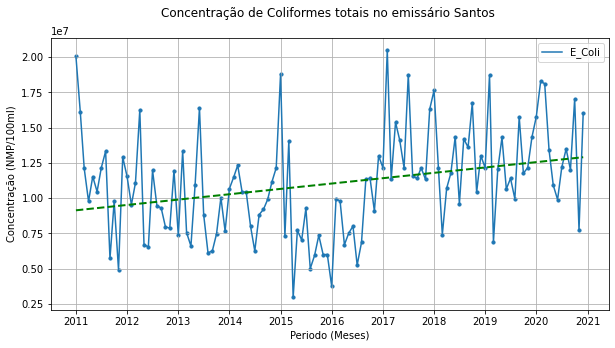

In [40]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E_Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_unif_ec()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [41]:
def regressao_frac_ec ():

    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear1 = np.poly1d((a[0], b[0]))

    a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear2 = np.poly1d((a[1], b[1]))

    a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear3 = np.poly1d((a[2], b[2]))
    
    a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear4 = np.poly1d((a[3], b[3]))

    a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear5 = np.poly1d((a[4], b[4]))

    a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear6 = np.poly1d((a[5], b[5]))

    a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear7 = np.poly1d((a[6], b[6]))

    a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear8 = np.poly1d((a[7], b[7]))

    a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear9 = np.poly1d((a[8], b[8]))

    a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear10 = (np.poly1d((a[9], b[9])))

    return ec_santos_linear1, ec_santos_linear2, ec_santos_linear3, ec_santos_linear4, ec_santos_linear5, ec_santos_linear6, ec_santos_linear7, ec_santos_linear8, ec_santos_linear9, ec_santos_linear10

regressao_frac_ec()

(poly1d([ -731125.        , 16321333.33333333]),
 poly1d([ -186136.36363636, 11221969.6969697 ]),
 poly1d([ -177010.48951049, 10198484.84848485]),
 poly1d([  -57873.25174825, 10447905.3030303 ]),
 poly1d([ -665559.44055944, 12441969.6969697 ]),
 poly1d([ 433828.67132867, 5729696.96969697]),
 poly1d([ -181216.78321678, 15104284.09090909]),
 poly1d([   55684.44055944, 12269571.96969697]),
 poly1d([   18563.81118881, 12387522.72727273]),
 poly1d([ -337403.84615385, 15936666.66666666]))

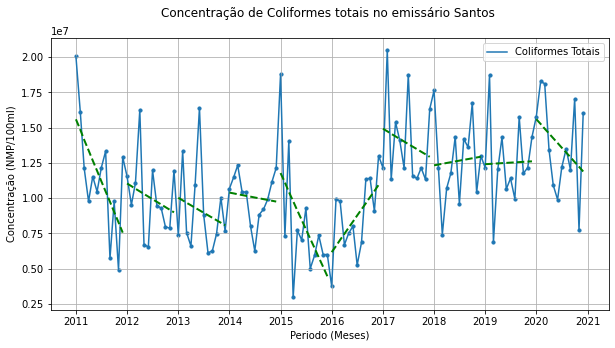

In [42]:
# Plot with linear regression for each year (E.coli)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_frac_ec()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_frac_ec()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_frac_ec()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_frac_ec()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_frac_ec()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_frac_ec()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_frac_ec()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_frac_ec()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_frac_ec()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_frac_ec()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

### PG1

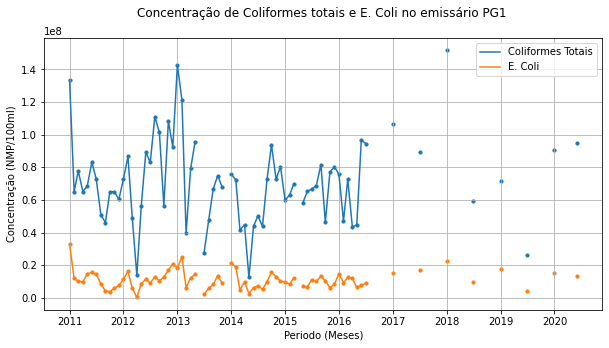

In [43]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG1 \n')
plt.legend(loc='best')
plt.grid()
 
 

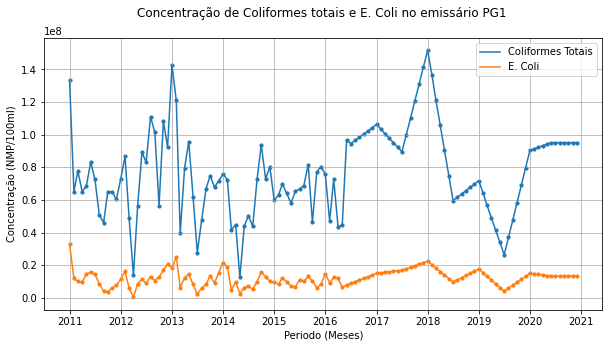

In [44]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG1 \n')
plt.legend(loc='best')
plt.grid()

### PG2

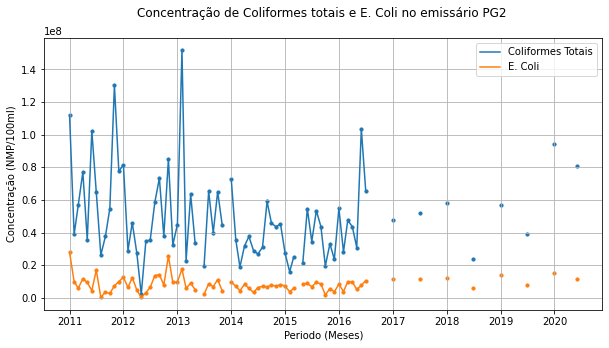

In [45]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG2 \n')
plt.legend(loc='best')
plt.grid()

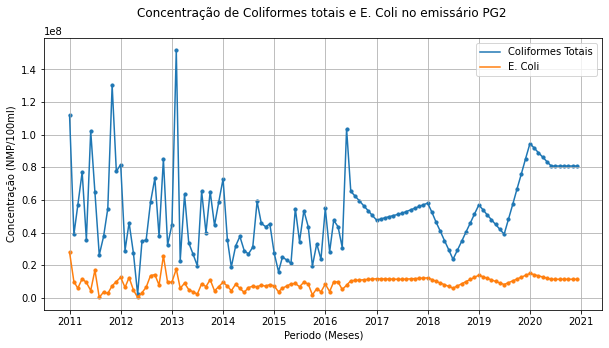

In [46]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG2 \n')
plt.legend(loc='best')
plt.grid()

### PG3

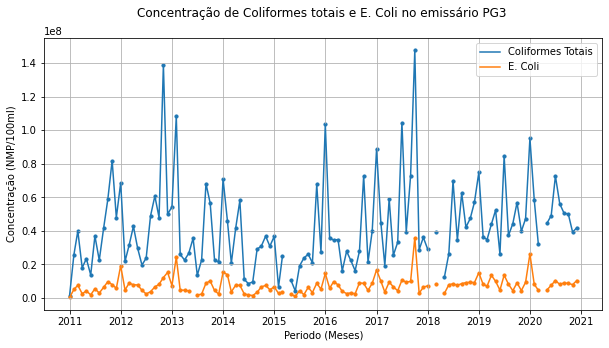

In [47]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG3 \n')
plt.legend(loc='best')
plt.grid()

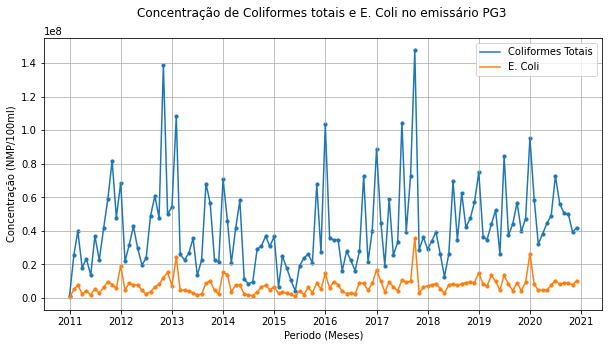

In [48]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG3 \n')
plt.legend(loc='best')
plt.grid()

### Guarujá

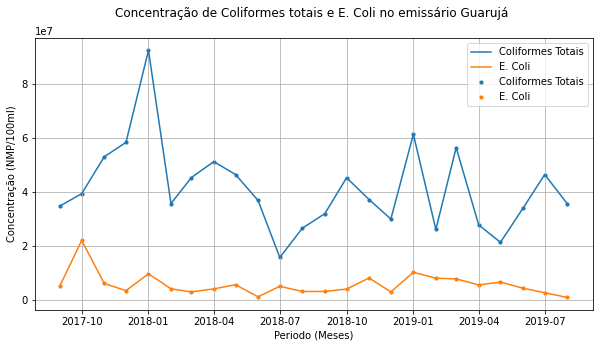

In [49]:
# Now you can use xs to slice the dateframe based on levels - df.xs('location1',level='loc',axis=1)
# pd.notnull(ct_ecoli).sum() # Check if the dataframe passed correctly

# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais',s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli',s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()
 

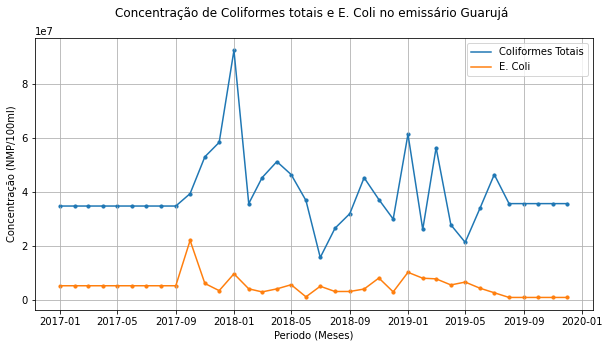

In [50]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

### All five ocean outfalls' data